# DSC 530 Final Project Code
## Author Kiana Gonzalez-Rodholm
## 6/3/2021

### Data Cleaning

In [3]:
# read in data file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

df = pd.read_csv("country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [4]:
# remove unnessessary columns
df1 = df.drop(['iso_code', 'source_name', 'source_website', 'daily_vaccinations_raw', 'total_vaccinations', 
               'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations'], axis = 1)
df1.head()

,country,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,NaN,NaN,NaN,35.0,Oxford/AstraZeneca


In [5]:
# check columns with NaN values 
print("NaN values in total vaccinations per hundred: {}".format(df1.total_vaccinations_per_hundred.isnull().values.any()))
print("NaN values in people vaccinated per hundred: {}".format(df1.people_vaccinated_per_hundred.isnull().values.any()))
print("NaN values in people fully vaccinated per hundred: {}".format(df1.people_fully_vaccinated_per_hundred.isnull().values.any()))
print("NaN values in daily vaccinations per million: {}".format(df1.daily_vaccinations_per_million.isnull().values.any()))

# as we can see there are NaN values in all of the following columns

NaN values in total vaccinations per hundred: True
NaN values in people vaccinated per hundred: True
NaN values in people fully vaccinated per hundred: True
NaN values in daily vaccinations per million: True


In [6]:
# remove NaN values for those with no total vaccinations

# number of rows before removing values
df1_before = df1.shape

# remove rows
df1 = df1[np.isfinite(df1['total_vaccinations_per_hundred'])]

# number of rows after removing values
df1_after = df1.shape

# print results
print("The size of data went from {} rows to {} rows when removing NaN values.".format(df1_before[0],df1_after[0]))

The size of data went from 10757 rows to 6472 rows when removing NaN values.


### Histogram of each Variable

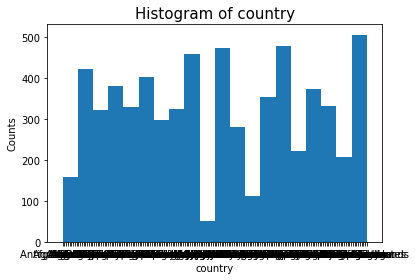

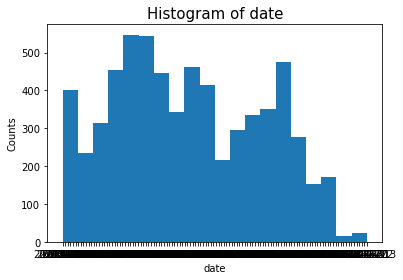

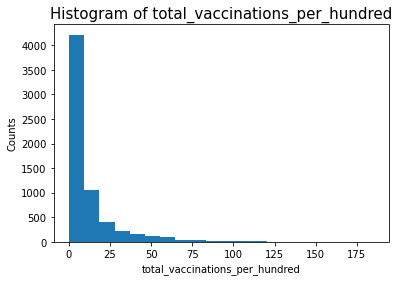

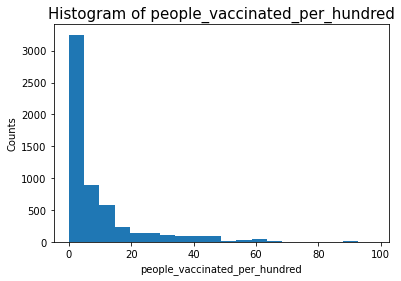

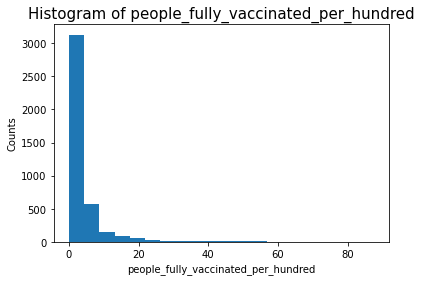

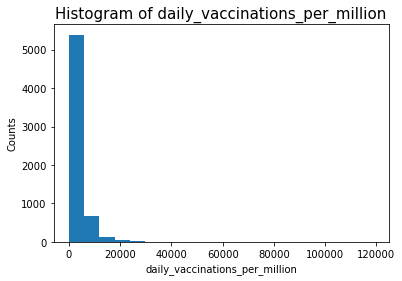

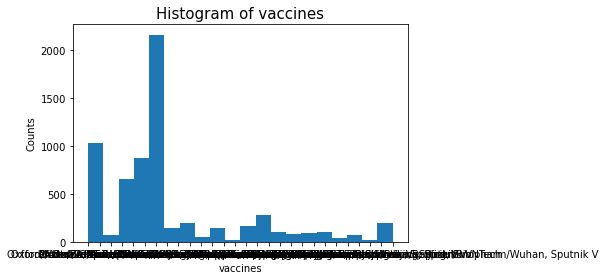

In [6]:
# histograms of all of the columns of df1 using a for loop
for c in df1.columns:
    plt.title("Histogram of " + c, fontsize=15)
    plt.hist(df1[c], bins=20)
    plt.ylabel("Counts")
    plt.xlabel(c)
    plt.show()

# I will not use the first two histograms  and the last as they are irrelevant to the research question

### Summary Statistics of Variables

In [8]:
# summary stats for total vaccine per hundred by country
df1.groupby('country').describe()['total_vaccinations_per_hundred']

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,4.0,0.117500,0.142449,0.00,0.0150,0.080,0.1825,0.31
Albania,40.0,2.107000,2.753159,0.00,0.0200,0.650,3.0700,8.43
Algeria,3.0,0.056667,0.098150,0.00,0.0000,0.000,0.0850,0.17
Andorra,12.0,5.413333,4.943702,0.75,1.9925,3.180,7.4750,16.10
Angola,6.0,0.230000,0.217071,0.00,0.0525,0.205,0.3650,0.55
...,...,...,...,...,...,...,...,...
Uzbekistan,2.0,0.050000,0.070711,0.00,0.0250,0.050,0.0750,0.10
Venezuela,5.0,0.086000,0.143805,0.00,0.0000,0.040,0.0500,0.34
Vietnam,34.0,0.034118,0.020467,0.00,0.0200,0.040,0.0500,0.06


In [11]:
# summary stats for people vaccinated per hundred by country
stats1 = df1.groupby('country').describe()['people_vaccinated_per_hundred']
stats1.head(20)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,4.0,0.117500,0.142449,0.00,0.0150,0.080,0.1825,0.31
Albania,16.0,0.031250,0.051235,0.00,0.0100,0.020,0.0200,0.21
Algeria,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,9.0,3.198889,2.534810,0.75,1.6700,2.770,3.1600,9.19
Angola,6.0,0.230000,0.217071,0.00,0.0525,0.205,0.3650,0.55
Anguilla,6.0,20.420000,14.033679,0.00,11.3075,22.300,31.5450,35.65
Antigua and Barbuda,4.0,19.470000,13.015217,0.00,18.5100,25.450,26.4100,26.98
Argentina,76.0,3.145526,2.764606,0.54,0.7875,1.745,5.5725,9.39
Armenia,1.0,0.020000,NaN,0.02,0.0200,0.020,0.0200,0.02


In [12]:
# summary stats for people fully vaccinated per hundred by country
stats2 = df1.groupby('country').describe()['people_fully_vaccinated_per_hundred']
stats2.head(20)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,5.0,0.016000,0.008944,0.00,0.0200,0.020,0.0200,0.02
Algeria,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,3.0,1.600000,0.069282,1.52,1.5800,1.640,1.6400,1.64
Angola,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anguilla,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,76.0,0.792237,0.494645,0.01,0.4625,0.660,1.3400,1.57
Armenia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# summary stats for daily vaccinations per million by country
stats3 = df1.groupby('country').describe()['daily_vaccinations_per_million']
stats3.head(20)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,3.0,62.000000,23.430749,35.0,54.50,74.0,75.50,77.0
Albania,39.0,1535.358974,2075.934165,0.0,22.50,352.0,2491.50,6028.0
Algeria,2.0,43.000000,59.396970,1.0,22.00,43.0,64.00,85.0
Andorra,11.0,2381.454545,2631.763415,362.0,796.00,958.0,2983.50,8788.0
Angola,5.0,155.800000,82.750831,27.0,130.00,184.0,193.00,245.0
Anguilla,5.0,9438.800000,7419.778278,3999.0,4733.00,6466.0,9932.00,22064.0
Antigua and Barbuda,3.0,5636.666667,3771.481981,1644.0,3885.50,6127.0,7633.00,9139.0
Argentina,81.0,1155.641975,913.673318,143.0,310.00,878.0,1943.00,2825.0
Armenia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Comparing Two Scenarios Using a PMF

In [14]:
# United States data
us_data = df1[df1.country == 'United States']
# other countries data
others_data = df1[df1.country != 'United States']

# pmfs for both scenarios looking at total vaccinations
us_pmf = thinkstats2.Pmf(us_data.total_vaccinations_per_hundred, label = 'US')
others_pmf = thinkstats2.Pmf(others_data.total_vaccinations_per_hundred, label = 'Others')

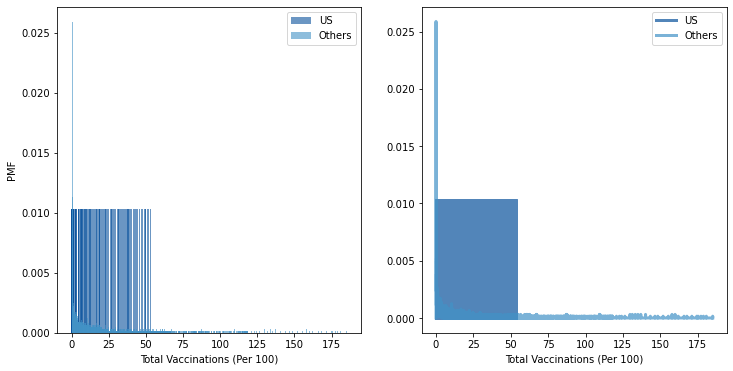

In [15]:
# plot the two scenarios using PMFs and Hist
width=0.7
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(us_pmf, align='right', width=width)
thinkplot.Hist(others_pmf, align='left', width=width)
thinkplot.Config(xlabel='Total Vaccinations (Per 100)', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([us_pmf, others_pmf])
thinkplot.Config(xlabel='Total Vaccinations (Per 100)')

### CDF of Total People Vaccinated

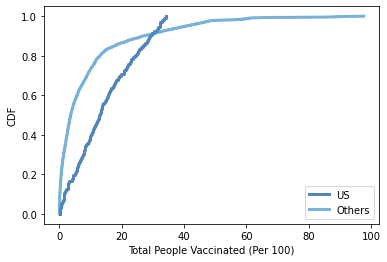

In [16]:
# cdfs for US vs other countries 
us_cdf = thinkstats2.Cdf(us_data.people_vaccinated_per_hundred, label = 'US')
others_cdf = thinkstats2.Cdf(others_data.people_vaccinated_per_hundred, label = 'Others')

# plot CDFs
thinkplot.PrePlot(2)
thinkplot.Cdfs([us_cdf, others_cdf])
thinkplot.Config(xlabel='Total People Vaccinated (Per 100)', ylabel='CDF')

### Analytical Distribution

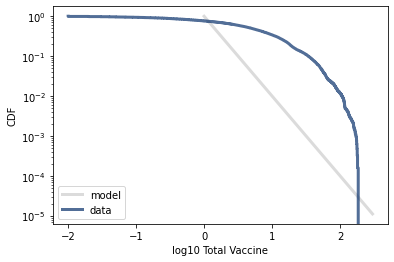

In [20]:
# will try a Pareto distribution

cdf = thinkstats2.Cdf(df2.total_vaccinations_per_hundred, label='data')
cdf_log = thinkstats2.Cdf(log_data, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=1, alpha=2, low=1, high=300)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 Total Vaccine',
                 ylabel='CDF',
                 yscale='log', loc='lower left')

# we can see that this is not a good fit for the data

In [18]:
# try a lognormal model on the data using function from text
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='weights')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 6307 0.5588009651235493 0.803734761787196


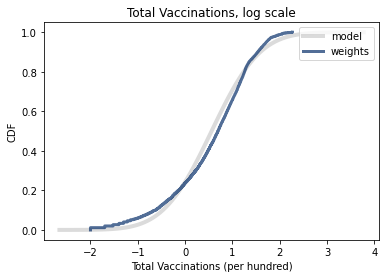

In [19]:
# create a data frame where vaccinations not equal to zero to avoid divide by zero issue
df2 = df1[df1.total_vaccinations_per_hundred != 0.00]
log_data = np.log10(df2.total_vaccinations_per_hundred)

# lognormal model
MakeNormalModel(log_data)
thinkplot.Config(title='Total Vaccinations, log scale', xlabel='Total Vaccinations (per hundred)',
                 ylabel='CDF', loc='upper right')

# it looks like a lognormal model might be the best fit for this data set

### Scatterplots, Correlation, and Covariance

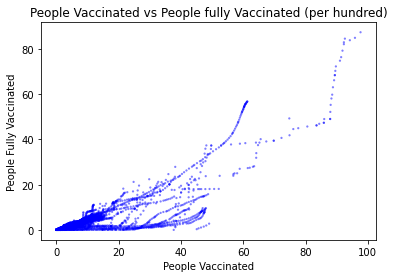

In [23]:
import thinkstats2
import thinkplot
%matplotlib inline

df1_drop = df1.dropna(subset=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'])
df1_drop2 = df1.dropna(subset=['total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred'])

# scatterplot of people vaccinated per hundred vs people fully vaccinated per hundred
thinkplot.Scatter(df1_drop.people_vaccinated_per_hundred, df1_drop.people_fully_vaccinated_per_hundred, alpha=0.5, s=5)
thinkplot.Config(title='People Vaccinated vs People fully Vaccinated (per hundred)',
                 xlabel='People Vaccinated',
                 ylabel='People Fully Vaccinated',
                 legend=False)

In [24]:
# covariance function from text
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# correlation function from text
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# Pearson's correlation result
Corr(df1_drop.people_vaccinated_per_hundred, df1_drop.people_fully_vaccinated_per_hundred)

0.8202384565786762

In [26]:
# Spearman's correlation function from text
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

# Spearman's correlation result
SpearmanCorr(df1_drop.people_vaccinated_per_hundred, df1_drop.people_fully_vaccinated_per_hundred)

0.8061366462984914

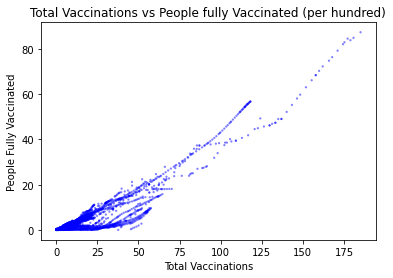

In [20]:
# scatterplot of total vaccinations per hundred vs people fully vaccinated per hundred
thinkplot.Scatter(df1_drop2.total_vaccinations_per_hundred, df1_drop2.people_fully_vaccinated_per_hundred, alpha=0.5, s=5)
thinkplot.Config(title='Total Vaccinations vs People fully Vaccinated (per hundred)',
                 xlabel='Total Vaccinations',
                 ylabel='People Fully Vaccinated',
                 legend=False)

In [25]:
# Pearson's correlation result
Corr(df1_drop2.total_vaccinations_per_hundred, df1_drop2.people_fully_vaccinated_per_hundred)

0.9283372567033286

In [27]:
# Spearman's correlation result
SpearmanCorr(df1_drop2.total_vaccinations_per_hundred, df1_drop2.people_fully_vaccinated_per_hundred)

0.8581775536792849

### Hypothesis Testing
#### Testing a DIfference in Means

In [28]:
# functions pulled from the text to run tests
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [30]:
# compares difference in mean pregnancy lengths
data = df1_drop2.total_vaccinations_per_hundred, df1_drop2.people_fully_vaccinated_per_hundred
ht = DiffMeansPermute(data)
p1 = ht.PValue()
print(p1)

0.0


### Regression Analysis

In [7]:
import statsmodels.formula.api as smf

# create a single regression model using people vaccinated as the dependant variable 
# and people fully vaccinated as the explanatory variable
model = smf.ols('people_vaccinated_per_hundred ~ people_fully_vaccinated_per_hundred', data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     people_vaccinated_per_hundred   R-squared:                       0.673
Model:                                       OLS   Adj. R-squared:                  0.673
Method:                            Least Squares   F-statistic:                     8535.
Date:                           Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                                   17:45:10   Log-Likelihood:                -14664.
No. Observations:                           4153   AIC:                         2.933e+04
Df Residuals:                               4151   BIC:                         2.934e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               5.4471      0.143     38.037      0.000       5.166       5.728
people_fully_vaccinated_per_hundred     1.3480      0.015     92.386      0.000       1.319       1.377
==============================================================================
Omnibus:                     1768.309   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7190.415
Skew:                           2.124   Prob(JB):                         0.00
Kurtosis:                       7.849   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""